In [20]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
data = pd.read_csv('weatherHistory.csv', index_col='Date', parse_dates=True)
data.head()

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km)
Date,,,,,,
2006-03-31 22:00:00,Partly Cloudy,9.472222,0.89,14.1197,251,15.8263
2006-03-31 23:00:00,Partly Cloudy,9.355556,0.86,14.2646,259,15.8263
2006-04-01 00:00:00,Mostly Cloudy,9.377778,0.89,3.9284,204,14.9569
2006-04-01 01:00:00,Partly Cloudy,8.288889,0.83,14.1036,269,15.8263
2006-04-01 02:00:00,Mostly Cloudy,8.755556,0.83,11.0446,259,15.8263


In [21]:
data=data['Temperature (C)']
data=data['2006-03-31':'2009.12.31']
data.tail()

Date
2009-09-09 18:00:00    20.222222
2009-09-09 19:00:00    17.777778
2009-09-09 20:00:00    16.666667
2009-09-09 21:00:00    17.394444
2009-12-31 23:00:00     9.444444
Name: Temperature (C), dtype: float64

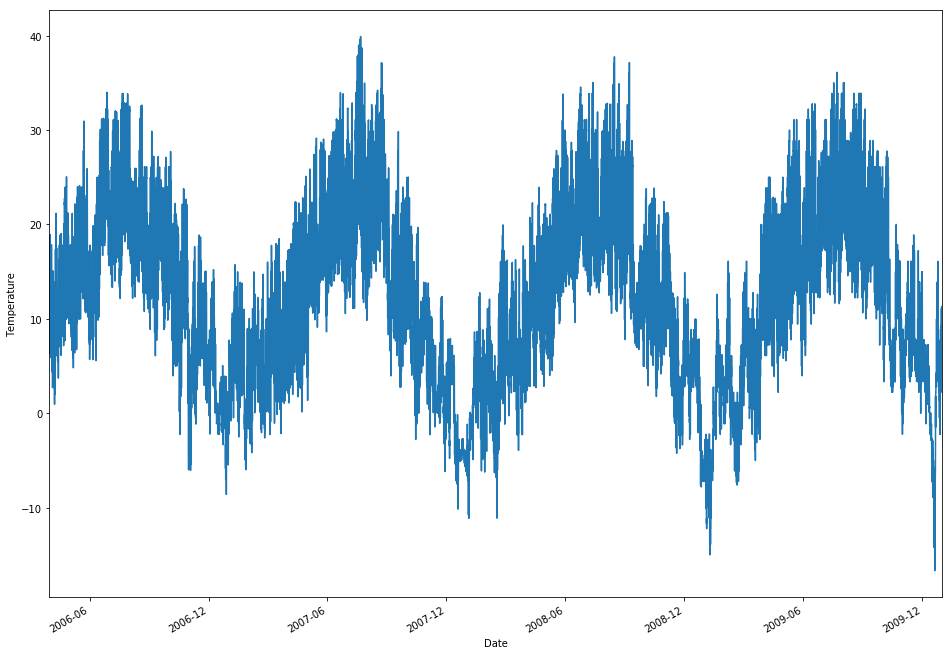

In [22]:
data.plot(figsize=(16,12))
plt.ylabel('Temperature')

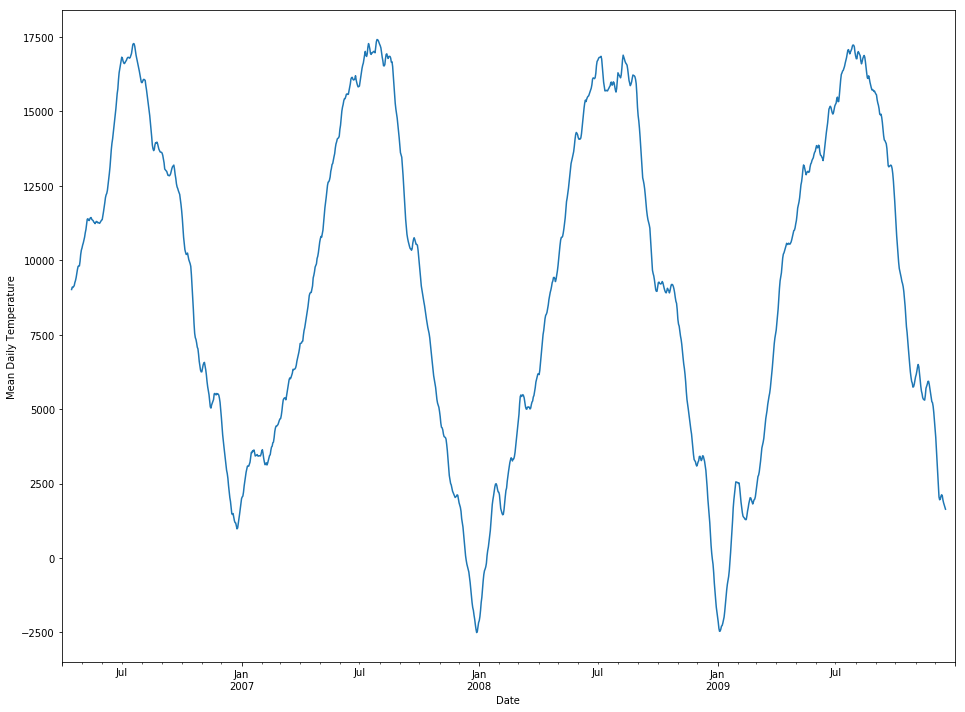

In [24]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(figsize=(16,12))
plt.ylabel('Mean Daily Temperature')

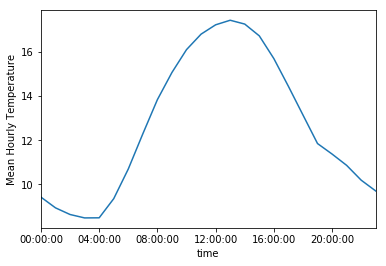

In [29]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks)
plt.ylabel('Mean Hourly Temperature')


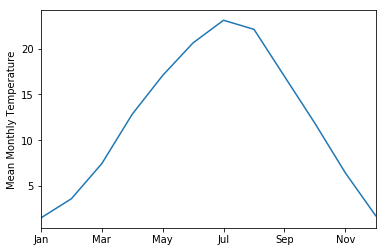

In [30]:
by_month = data.groupby(data.index.month).mean()
by_month.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
by_month.plot()
plt.ylabel('Mean Monthly Temperature')

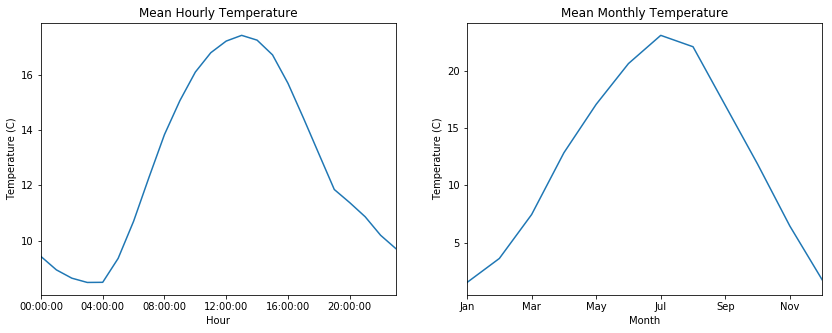

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(ax=ax[0], title='Mean Hourly Temperature', xticks=hourly_ticks)
by_month.plot(ax=ax[1], title='Mean Monthly Temperature')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Temperature (C)')
ax[0].set_ylabel('Temperature (C)')
ax[0].set_xlabel('Hour')
plt.show()